In [1]:
import torch
import numpy as np
from ANN_model import Features13_NN
from Dataset import Features12_dataset
from Utils import loss_plot
from torch.utils.data import DataLoader
from Train import train_model

In [2]:
BATCH_SIZE = 100
RANDOM_STATE = 42

X = np.load('Numeric_feature_dataset/features13_norm_train.npy')
y = np.load('Numeric_feature_dataset/target_train.npy')
train_dataset = Features12_dataset(X, y, train=True, random_state=RANDOM_STATE)
test_dataset = Features12_dataset(X, y, train=False, random_state=RANDOM_STATE)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

model = Features13_NN()
model_trained, trainloss, testloss = train_model(model, train_loader, test_loader, num_epochs=1000, lr=0.01, weight_decay=1e-4, factor=0.5, min_lr=1e-6, patience=50, threshold=0.01)

[Epoch 1/1000] train_loss: 0.100, test_loss: 0.052 | train_mape: 23.62, test_mape: 18.64
[Epoch 2/1000] train_loss: 0.058, test_loss: 0.049 | train_mape: 21.39, test_mape: 17.79
[Epoch 3/1000] train_loss: 0.054, test_loss: 0.050 | train_mape: 20.41, test_mape: 17.40
[Epoch 4/1000] train_loss: 0.053, test_loss: 0.051 | train_mape: 19.88, test_mape: 17.76
[Epoch 5/1000] train_loss: 0.052, test_loss: 0.045 | train_mape: 19.54, test_mape: 17.58
[Epoch 6/1000] train_loss: 0.052, test_loss: 0.043 | train_mape: 19.32, test_mape: 17.35
[Epoch 7/1000] train_loss: 0.050, test_loss: 0.042 | train_mape: 19.10, test_mape: 17.17
[Epoch 8/1000] train_loss: 0.050, test_loss: 0.047 | train_mape: 18.95, test_mape: 17.13
[Epoch 9/1000] train_loss: 0.048, test_loss: 0.045 | train_mape: 18.79, test_mape: 17.06
[Epoch 10/1000] train_loss: 0.048, test_loss: 0.044 | train_mape: 18.65, test_mape: 16.97
[Epoch 11/1000] train_loss: 0.047, test_loss: 0.044 | train_mape: 18.53, test_mape: 16.89
[Epoch 12/1000] tra

In [3]:
from Utils import save_with_unique_name 
#### 記得改檔名 ####
filename = 'Models/features13_model2.pt'
filename = save_with_unique_name(filename)
torch.save(model_trained.state_dict(), filename)

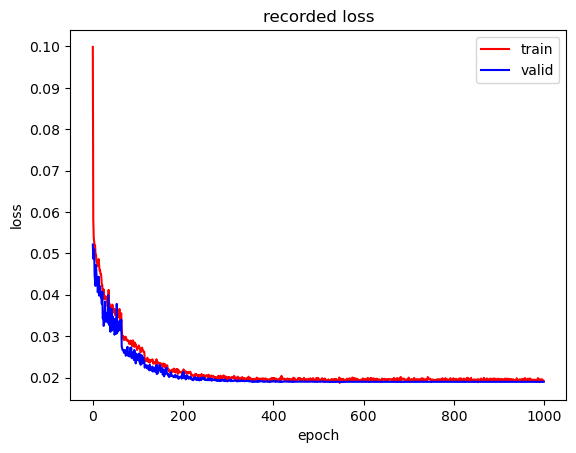

In [4]:
loss_plot(trainloss, testloss)

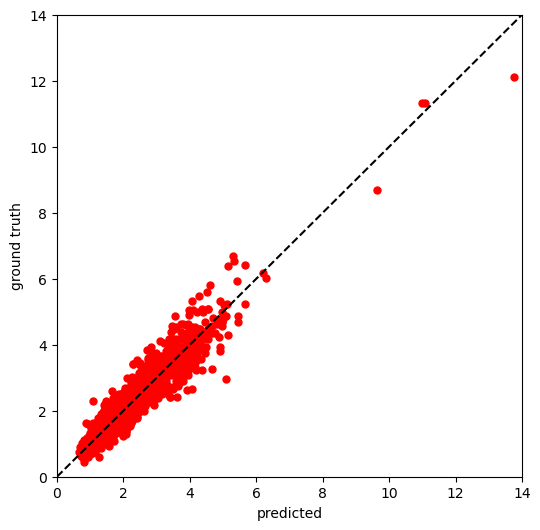

In [5]:
from Utils import true_pred_plot, model_pred

pred_test, true_test = model_pred(model_trained, test_loader)
true_pred_plot(np.exp(pred_test), true_test)

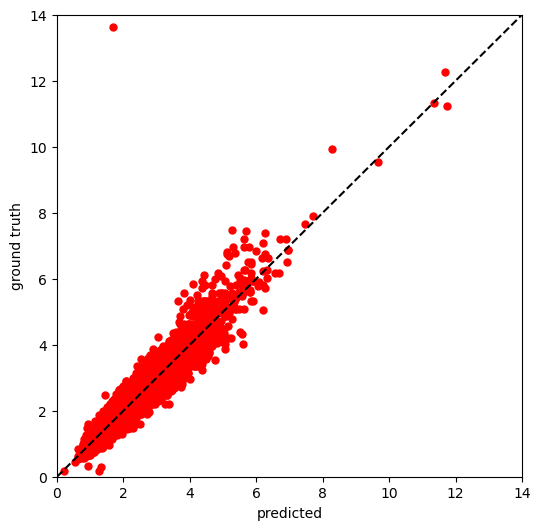

In [6]:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)
pred_train, true_train = model_pred(model_trained, train_loader)
true_pred_plot(np.exp(pred_train), true_train)